In [598]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")
np

In [599]:
df.shape

(32754, 20)

In [600]:
df.columns

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?', u'employment_status',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data', u'Continent',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'NaN',
       u'(For U. S. redditors) In which state do you live?', u'NaN.1',
       u'NaN.2', u'NaN.3', u'NaN.4'],
      dtype='object')

In [601]:
df.columns = ['entry_id', 'gender', 'age_category', 
              'marital_status', 'employment_status', 'military_service', 
              'children_under_ the_age_of_18_in_your_household', 'education_level', 'country', 
              'continent', 'gross_household_income', 'treated_subreddit_data', 'are_you_a_dog_or_a_cat_person', 
              'if_you_were_a_cheese_what_cheese_would_you_be', 'na1', 'state', 
              'na3', 'na4', 'na5', 'na6']

In [602]:
df.describe()

,entry_id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


In [603]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(df.dtypes[df.dtypes != "object"].index)
df[numeric_variables].head()

,entry_id
0,18787
1,22086
2,26732
3,30491
4,7402


In [604]:
df.employment_status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: employment_status, dtype: int64

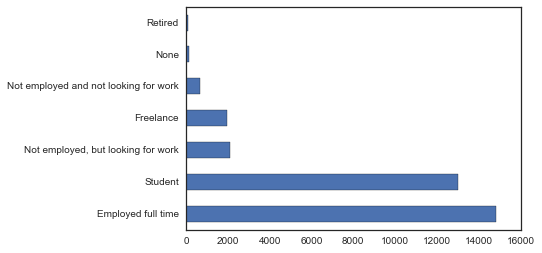

In [605]:
df.employment_status.value_counts().plot(kind='barh')

In [606]:
#convert dependent variable into numeric values
df.replace({'employment_status' : {'Employed full time' : 0, 'Student' : 1, 'Not employed, but looking for work' : 2, 'Freelance' : 3, 'Not employed and not looking for work' : 4, 'None' : 5, 'Retired' : 6}})

,entry_id,gender,age_category,marital_status,employment_status,military_service,children_under_ the_age_of_18_in_your_household,education_level,country,continent,gross_household_income,treated_subreddit_data,are_you_a_dog_or_a_cat_person,if_you_were_a_cheese_what_cheese_would_you_be,na1,state,na3,na4,na5,na6
0,18787,Male,25-34,In a relationship,0,No,No,Some college,Canada,North America,"$50,000 - $69,999",gonewild,I like cats,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
1,22086,Male,Under 18,Single,1,No,Yes,High school graduate or equivalent,Canada,North America,"$150,000 or more",trees,I like dogs,Feta,NaN,NaN,NaN,NaN,NaN,NaN
2,26732,Male,18-24,Forever Alone,0,No,No,Bachelor's degree,Canada,North America,"$50,000 - $69,999",askscience,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
3,30491,Female,18-24,In a relationship,0,No,No,Some college,Canada,North America,"$20,000 - $29,999",can't pick one,I like dogs,Brie,NaN,NaN,NaN,NaN,NaN,NaN
4,7402,Male,18-24,Single,1,No,No,High school graduate or equivalent,Canada eh,North America,"$50,000 - $69,999",trees,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
5,15110,Male,18-24,Forever Alone,1,No,No,High school graduate or equivalent,United Kingdom,Europe,"$100,000 - $149,999",f7u12,I like dogs,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,27607,Male,35-44,Married/civil union/domestic partnership,2,No,No,Bachelor's degree,United Kingdom,Europe,"Under $20,000",all,I like cats,Brie,NaN,NaN,NaN,NaN,NaN,NaN
7,3824,Male,18-24,Forever Alone,0,No,No,Some college,/,NaN,NaN,NaN,I like dogs,Munster,NaN,NaN,NaN,NaN,NaN,NaN
8,11254,Male,18-24,Single,0,No,No,Bachelor's degree,Afghanistan,Asia,"$20,000 - $29,999",zen,I like cats,Paneer,NaN,NaN,NaN,NaN,NaN,NaN
9,16392,Male,25-34,Forever Alone,0,No,No,Graduate or professional degree,Afghanistan,Asia,"Under $20,000",pics,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN


In [607]:
df.gross_household_income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
Name: gross_household_income, dtype: int64

In [608]:
df.replace({'gross_household_income' : {'under $20,000' : '19', '$50,000 - $69,999' : '50', '$70,000 - $99,999' : '70', '$100,000 - $149,999' : '100', '$20,000 - $29,999' : '20', '$30,000 - $39,999' : '30', '$150,000 or more' : '150', '$40,000 - $49,999' : '40'}})

,entry_id,gender,age_category,marital_status,employment_status,military_service,children_under_ the_age_of_18_in_your_household,education_level,country,continent,gross_household_income,treated_subreddit_data,are_you_a_dog_or_a_cat_person,if_you_were_a_cheese_what_cheese_would_you_be,na1,state,na3,na4,na5,na6
0,18787,Male,25-34,In a relationship,Employed full time,No,No,Some college,Canada,North America,50,gonewild,I like cats,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
1,22086,Male,Under 18,Single,Student,No,Yes,High school graduate or equivalent,Canada,North America,150,trees,I like dogs,Feta,NaN,NaN,NaN,NaN,NaN,NaN
2,26732,Male,18-24,Forever Alone,Employed full time,No,No,Bachelor's degree,Canada,North America,50,askscience,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
3,30491,Female,18-24,In a relationship,Employed full time,No,No,Some college,Canada,North America,20,can't pick one,I like dogs,Brie,NaN,NaN,NaN,NaN,NaN,NaN
4,7402,Male,18-24,Single,Student,No,No,High school graduate or equivalent,Canada eh,North America,50,trees,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
5,15110,Male,18-24,Forever Alone,Student,No,No,High school graduate or equivalent,United Kingdom,Europe,100,f7u12,I like dogs,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,27607,Male,35-44,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United Kingdom,Europe,"Under $20,000",all,I like cats,Brie,NaN,NaN,NaN,NaN,NaN,NaN
7,3824,Male,18-24,Forever Alone,Employed full time,No,No,Some college,/,NaN,NaN,NaN,I like dogs,Munster,NaN,NaN,NaN,NaN,NaN,NaN
8,11254,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,Afghanistan,Asia,20,zen,I like cats,Paneer,NaN,NaN,NaN,NaN,NaN,NaN
9,16392,Male,25-34,Forever Alone,Employed full time,No,No,Graduate or professional degree,Afghanistan,Asia,"Under $20,000",pics,I like turtles,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN


In [609]:
# Drop the variables
df.drop(["country", "state", "treated_subreddit_data", "are_you_a_dog_or_a_cat_person", "if_you_were_a_cheese_what_cheese_would_you_be", "na1", "na3", "na4", "na5", "na6"], axis=1, inplace=True)

In [610]:
X = df
y = X.pop("employment_status")

In [611]:
str(np.NaN)

'nan'

In [612]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [613]:
describe_categorical(X)

,gender,age_category,marital_status,military_service,children_under_ the_age_of_18_in_your_household,education_level,continent,gross_household_income
count,32553,32666,32749,32749,32535,32610,32550,31139
unique,2,7,6,2,2,7,7,8
top,Male,18-24,Single,No,No,Bachelor's degree,North America,"Under $20,000"
freq,26418,15802,10428,30526,27488,11046,24361,7892


In [614]:
X.ix[:,['employment_status', 'gender', 'military_service', 'continent', 'children_under_ the_age_of_18_in_your_household', 'gross_household_income']].head()

,employment_status,gender,military_service,continent,children_under_ the_age_of_18_in_your_household,gross_household_income
0,NaN,Male,No,North America,No,"$50,000 - $69,999"
1,NaN,Male,No,North America,Yes,"$150,000 or more"
2,NaN,Male,No,North America,No,"$50,000 - $69,999"
3,NaN,Female,No,North America,No,"$20,000 - $29,999"
4,NaN,Male,No,North America,No,"$50,000 - $69,999"


In [ ]:
fig = plt.figure(figsize = (9,9))
X = X.ix('military_service')
plt.xlabel('gender', 'military_service', 'continent', size = 15)
plt.ylabel('employment_status', size = 15)
plt.title(X, size = 25)
sns.heatmap(X, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'blues_r')

In [616]:
categorical_variables = ['gender', 'military_service', 'education_level', 'continent', 'children_under_ the_age_of_18_in_your_household', 'gross_household_income']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

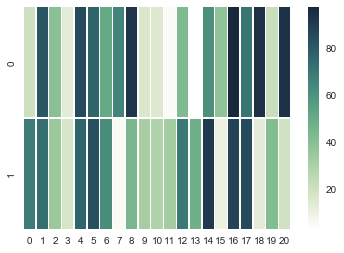

In [617]:
import random

df = pd.DataFrame()
df['X'] = random.sample(range(1,100), 21)
df['y']= random.sample(range(1,100), 21)

cr = sns.cubehelix_palette(as_cmap=True, rot=-.5, light=1)
sns.heatmap([df.y, df.X], linewidth=.5,cmap=cr)

In [618]:
#Tried to run this and code failed due to model fit issues...I tried to convert the data to into numeric but wasn't successful
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=50)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

ValueError: could not convert string to float: Engaged

In [619]:
X

,entry_id,age_category,marital_status,gender_Female,gender_Male,gender_Missing,military_service_Missing,military_service_No,military_service_Yes,education_level_Associate degree,...,children_under_ the_age_of_18_in_your_household_Yes,"gross_household_income_$100,000 - $149,999","gross_household_income_$150,000 or more","gross_household_income_$20,000 - $29,999","gross_household_income_$30,000 - $39,999","gross_household_income_$40,000 - $49,999","gross_household_income_$50,000 - $69,999","gross_household_income_$70,000 - $99,999",gross_household_income_Missing,"gross_household_income_Under $20,000"
0,18787,25-34,In a relationship,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22086,Under 18,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26732,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30491,18-24,In a relationship,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7402,18-24,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,15110,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,27607,35-44,Married/civil union/domestic partnership,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3824,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,11254,18-24,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,16392,25-34,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [620]:
# Look at all the columns in the dataset
def printall(X, max_rows=20):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,entry_id,age_category,marital_status,gender_Female,gender_Male,gender_Missing,military_service_Missing,military_service_No,military_service_Yes,education_level_Associate degree,education_level_Bachelor's degree,education_level_Graduate or professional degree,education_level_High school graduate or equivalent,education_level_Missing,education_level_Some college,education_level_Some high school,education_level_Trade or Vocational degree,continent_Africa,continent_Antarctica,continent_Asia,continent_Australia_Oceania,continent_Europe,continent_Missing,continent_North America,continent_South America,children_under_ the_age_of_18_in_your_household_Missing,children_under_ the_age_of_18_in_your_household_No,children_under_ the_age_of_18_in_your_household_Yes,"gross_household_income_$100,000 - $149,999","gross_household_income_$150,000 or more","gross_household_income_$20,000 - $29,999","gross_household_income_$30,000 - $39,999","gross_household_income_$40,000 - $49,999","gross_household_income_$50,000 - $69,999","gross_household_income_$70,000 - $99,999",gross_household_income_Missing,"gross_household_income_Under $20,000"
0,18787,25-34,In a relationship,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,22086,Under 18,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26732,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30491,18-24,In a relationship,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7402,18-24,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,15110,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,27607,35-44,Married/civil union/domestic partnership,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,3824,18-24,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,11254,18-24,Single,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,16392,25-34,Forever Alone,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [621]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

ValueError: could not convert string to float: Engaged

In [622]:
model.feature_importances_

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [623]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [624]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

ValueError: could not convert string to float: Engaged

In [625]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

ValueError: could not convert string to float: Engaged

In [626]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

ValueError: could not convert string to float: Engaged

In [628]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

ValueError: could not convert string to float: Engaged

In [629]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

ValueError: could not convert string to float: Engaged

In [ ]:
#X['gender'] = pd.get_dummies(X.gender)['male']

In [630]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

ValueError: could not convert string to float: Under $20,000